 - Using your data, create a minimum of one scatter plot, one histogram, one box plot and one bar graph (you can add more than one visualization of each type of you choose). Graphs should contain the proper labeling of the x and y axis when appropriate as well as a title for the graph.
 - Explain what insight or information is inferred from these visualizations. The explanation should be in the notebook in markdown cells.

In [299]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import pandas as pd
import plotly.plotly as py
import cufflinks as cf
from ipywidgets import interact
cf.go_offline()
import matplotlib.pyplot as plt


In [266]:
spacex = pd.read_csv('Data/spacex_launch_data.csv')
spacex.head()



,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Mission Outcome,Landing Outcome
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,NaN,LEO,SpaceX,Success,Failure (parachute)
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",NaN,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525,LEO (ISS),NASA (COTS),Success,No attempt
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [267]:
spacex.dtypes

Flight Number        object
Date                 object
Time (UTC)           object
Booster Version      object
Launch Site          object
Payload              object
Payload Mass (kg)    object
Orbit                object
Customer             object
Mission Outcome      object
Landing Outcome      object
dtype: object

### New column 'Payload Mass v2' =  Changing 'Payload Mass' into numerical, removing '~', replacing 'Classified' by NaN values

In [268]:
spacex["Payload Mass v2"] = spacex["Payload Mass (kg)"].str.replace('\xa0', '', regex=True)
spacex["Payload Mass v2"] = spacex["Payload Mass v2"].str.replace('~', '', regex=True)
spacex["Payload Mass v2"] = spacex["Payload Mass v2"].str.replace(',', '', regex=True)

spacex["Payload Mass v2"] = spacex["Payload Mass v2"].replace({'Classified':np.nan})
spacex.head()
#spacex["Payload Mass (kg)"].dropna()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Mission Outcome,Landing Outcome,Payload Mass v2
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,NaN,LEO,SpaceX,Success,Failure (parachute),NaN
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",NaN,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute),NaN
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525,LEO (ISS),NASA (COTS),Success,No attempt,525
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt,500
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt,677


### Converting 'Date' column format to datetime64[ns]

In [269]:
spacex['Date1'] = pd.to_datetime(spacex['Date'])
print(spacex.dtypes)
spacex.head()


Flight Number                object
Date                         object
Time (UTC)                   object
Booster Version              object
Launch Site                  object
Payload                      object
Payload Mass (kg)            object
Orbit                        object
Customer                     object
Mission Outcome              object
Landing Outcome              object
Payload Mass v2              object
Date1                datetime64[ns]
dtype: object


,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Mission Outcome,Landing Outcome,Payload Mass v2,Date1
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,NaN,LEO,SpaceX,Success,Failure (parachute),NaN,2010-06-04
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",NaN,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute),NaN,2010-12-08
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525,LEO (ISS),NASA (COTS),Success,No attempt,525,2012-05-22
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt,500,2012-10-08
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt,677,2013-03-01


In [270]:
spacex['Year'] = pd.DatetimeIndex(spacex['Date1']).year
spacex['Month'] = pd.DatetimeIndex(spacex['Date1']).month
spacex['Day'] = pd.DatetimeIndex(spacex['Date1']).day
spacex.head(8)


,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Mission Outcome,Landing Outcome,Payload Mass v2,Date1,Year,Month,Day
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,NaN,LEO,SpaceX,Success,Failure (parachute),NaN,2010-06-04,2010,6,4
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",NaN,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute),NaN,2010-12-08,2010,12,8
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525,LEO (ISS),NASA (COTS),Success,No attempt,525,2012-05-22,2012,5,22
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt,500,2012-10-08,2012,10,8
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt,677,2013-03-01,2013,3,1
5,6,2013-09-29,16:00:00,F9 v1.1 B1003,VAFB SLC-4E,CASSIOPE,500,Polar LEO,MDA,Success,Uncontrolled (ocean),500,2013-09-29,2013,9,29
6,7,2013-12-03,22:41:00,F9 v1.1,CCAFS LC-40,SES-8,"3,170",GTO,SES,Success,No attempt,3170,2013-12-03,2013,12,3
7,8,2014-01-06,22:06:00,F9 v1.1,CCAFS LC-40,Thaicom 6,"3,325",GTO,Thaicom,Success,No attempt,3325,2014-01-06,2014,1,6


In [271]:
print(spacex.dtypes)


Flight Number                object
Date                         object
Time (UTC)                   object
Booster Version              object
Launch Site                  object
Payload                      object
Payload Mass (kg)            object
Orbit                        object
Customer                     object
Mission Outcome              object
Landing Outcome              object
Payload Mass v2              object
Date1                datetime64[ns]
Year                          int64
Month                         int64
Day                           int64
dtype: object


## Total Payload Mass launched into space since 2010

### Grouping by date the total mass of payload launched into space. Removing NaN values

In [272]:
# changing data types

spacex['Payload Mass v2'] = spacex['Payload Mass v2'].astype(float)


In [273]:
spacex_groupby = spacex.groupby('Year', as_index=False).agg({'Payload Mass v2':'mean'})
spacex_groupby.sort_values(by=['Year'], inplace=True)
spacex_groupby = spacex_groupby.dropna()
print(spacex_groupby.head())


spacex_groupby.iplot(kind='line', x='Year', xTitle='time',
           yTitle='Average Payload Mass', title='Average Payload Mass (kg) launched into space every year since 2010',
           color = 'blue')

   Year  Payload Mass v2
1  2012       512.500000
2  2013      1449.000000
3  2014      3019.333333
4  2015      2530.714286
5  2016      3401.625000


Line chart of Total Payload Mass launched into space between 2010 and 2018. 
Total payload mass seems to have increased and launches seem to be more frequent since 2010 

## Boxplot of Average Payload Mass (kg) and Landing Outcome

### creating new column for Landing Outcome : changing format, modifying string, removing parenthesis etc.

In [275]:
spacex["Landing Outcome v2"] = spacex["Landing Outcome"].str.replace(' ', '')
spacex["Landing Outcome v2"] = spacex["Landing Outcome v2"].str.replace(r" ?\([^)]+\)", "", regex = True)
spacex["Landing Outcome v2"][48] = 'Success'
spacex["Landing Outcome v2"].head()

0      Failure
1      Failure
2    Noattempt
3    Noattempt
4    Noattempt
Name: Landing Outcome v2, dtype: object

  Landing Outcome v2   Launch Site  Payload Mass v2
0         Controlled   CCAFS LC-40           1394.0
1         Controlled  CCAFS SLC-40           4230.0
2         Controlled   VAFB SLC-4E           9600.0
3            Failure   CCAFS LC-40           3291.0
4            Failure   VAFB SLC-4E            553.0


Text(0.5, 1.0, 'Boxplot of average Payload Mass (kg) launched into space between 2010 and 2018')

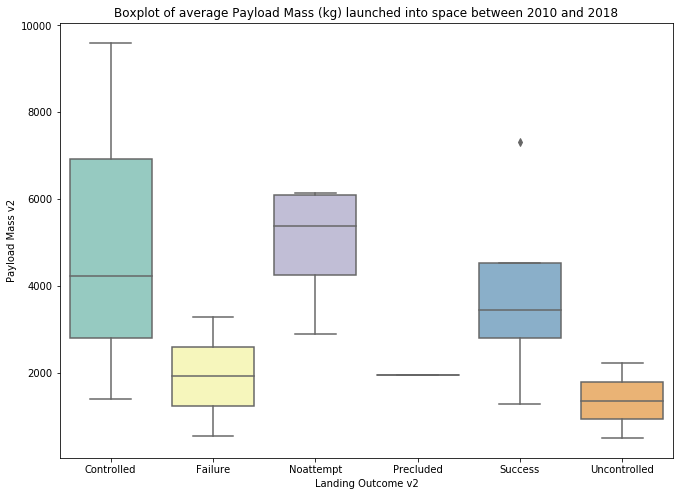

In [278]:
spacex_groupby = spacex.groupby(['Landing Outcome v2', 'Launch Site'], as_index=False).agg({'Payload Mass v2':'mean'})

print(spacex_groupby.head())


sns.mpl.rc("figure", figsize=(11,8))
sns.boxplot(x="Landing Outcome v2", y="Payload Mass v2", data= spacex_groupby, palette="Set3").set_title('Boxplot of average Payload Mass (kg) launched into space between 2010 and 2018')





Failure or uncontrolled landing tend to happen in lighter payload mass.

## Total number of flights and Mission outcome by Launch Site

### Total number of flights

In [279]:


flights = spacex.groupby(['Launch Site'], as_index=False).agg({'Flight Number': 'count'})
print(flights.head())

flights.iplot(kind='bar', x ='Launch Site', xTitle='Launch Site',
           yTitle='Total number of flights', title='Total number of flights by Launch Site')



    Launch Site  Flight Number
0   CCAFS LC-40             26
1  CCAFS SLC-40              7
2    KSC LC-39A             14
3   VAFB SLC-4E             10


Launch Site CCAFS LC-40 has launched more flights than the others.

### Mission outcome by Launch Site

In [280]:
success = pd.crosstab(spacex["Launch Site"], spacex["Mission Outcome"])
success

Mission Outcome,Failure (in flight),Success,Success (payload status unclear)
Launch Site,,,
CCAFS LC-40,1,25,0
CCAFS SLC-40,0,6,1
KSC LC-39A,0,14,0
VAFB SLC-4E,0,10,0


In [288]:
spacex["Mission Outcome v2"] = spacex["Mission Outcome"].str.replace(r" ?\([^)]+\)", "", regex = True)
spacex["Mission Outcome v2"] = spacex["Mission Outcome v2"].str.replace(' ', '')
spacex["Mission Outcome v2"].head()

0    Success
1    Success
2    Success
3    Success
4    Success
Name: Mission Outcome v2, dtype: object

In [289]:
success = pd.crosstab(spacex["Launch Site"], spacex["Mission Outcome v2"])
success

Mission Outcome v2,Failure,Success
Launch Site,,
CCAFS LC-40,1,25
CCAFS SLC-40,0,7
KSC LC-39A,0,14
VAFB SLC-4E,0,10


In [290]:
success.iplot(kind='bar', xTitle='Launch Site', 
           yTitle='Mission outcome', title='Mission Outcome by Launch Site')

### Total number of flights & Mission outcome by Launch Site

In [291]:
mix = pd.concat([flights.set_index('Launch Site'), success], axis=1)
mix

,Flight Number,Failure,Success
Launch Site,,,
CCAFS LC-40,26,1,25
CCAFS SLC-40,7,0,7
KSC LC-39A,14,0,14
VAFB SLC-4E,10,0,10


In [292]:
mix.iplot(kind='bar', xTitle='Launch Site', 
           yTitle='Total number of flights & Mission outcome', title='Total number of flights & Mission Outcome by Launch Site')

This bar graph shows the proportion of successes among total number of flights for each Launch Site

In [293]:
landing = pd.crosstab(spacex["Launch Site"], spacex["Landing Outcome v2"])
landing

Landing Outcome v2,Controlled,Failure,Noattempt,Precluded,Success,Uncontrolled
Launch Site,,,,,,
CCAFS LC-40,3,6,9,1,6,1
CCAFS SLC-40,1,0,3,0,3,0
KSC LC-39A,0,0,3,0,11,0
VAFB SLC-4E,1,1,3,0,4,1


The crosstab shows occurrences in landing outcomes by Launch Site

In [294]:
landing.iplot(kind='bar', xTitle='Launch Site', 
           yTitle='Total number of Landing outcome', title='Total number of Landing Outcome by Launch Site')

The bar graph shows total quantity of each landing outcome by launch site. Launch site KSC LC-39A seems to have more successes in absolute value and relatively to other outcomes.

### Total number of flights by Customer

                     Customer  Flight Number
0                ABS Eutelsat              2
1                     AsiaSat              2
2                   Bulsatcom              1
3                    EchoStar              1
4  Hisdesat exactEarth SpaceX              1


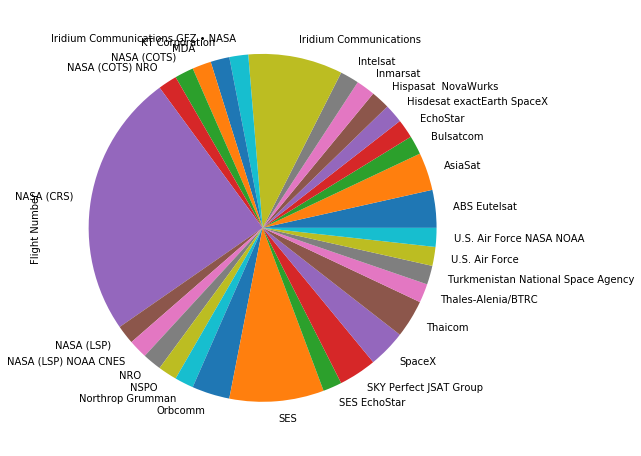

In [305]:
customers = spacex.groupby(['Customer'], as_index=False).agg({'Flight Number': 'count'})
print(customers.head())

#customers.iplot(kind='bar', x ='Customer', xTitle='Customer',
#           yTitle='Total number of flights', title='Total number of flights by Customer')

spacex['Flight Number'].groupby(spacex['Customer']).count().plot(kind='pie')


NASA (CRS) is the biggest customer in terms of flights number.

Iridium Communications and SES are second.

##  Total payload mass by Launch Site from 2010 to 2018

In [307]:
spacex.iplot(x='Date1', y='Payload Mass v2', categories='Launch Site',
           xTitle='Year', yTitle='Payload Mass v2',
           title=' Date (x-axis) vs. Payload Mass (kg) (y-axis) ')



KSC LC-39A started to launched in late 2017, whereas CCAFS LC-40 started right in 2012.
CCAFS SLC-40 is the lastest Launch Site to be in action.

VAFB SLC-4E is the Launch Site that launches the heaviest Payload Mass, compared to the others.